In [1]:
#import packages
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
%matplotlib inline

### Load Files and display first few rows

In [356]:
df1 = pd.read_json('./yelp_academic_dataset_tip.json', lines=True)

In [357]:
df1.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA
2,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
3,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
4,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ


In [2]:
df2 = pd.read_json('./yelp_academic_dataset_business.json', lines=True)

In [622]:
df2

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


In [360]:
df3 = pd.read_json('./yelp_academic_dataset_checkin.json', lines=True)

In [361]:
df3.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'..."
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}"
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23..."


# Explore

### Review Count, Stars, State

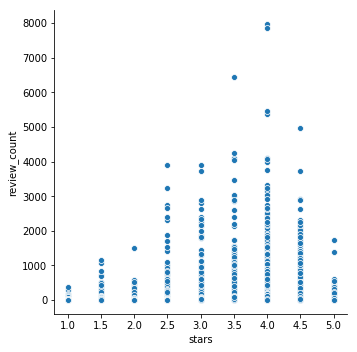

In [362]:
sns.pairplot(df2, x_vars=['stars'], y_vars='review_count', height=5)

In [363]:
state_avg = df2.groupby(['state'])[['stars','review_count']].mean()
state_avg.head()

,stars,review_count
state,,
01,3.590909,3.818182
10,4.500000,3.000000
11,4.500000,3.000000
4,5.000000,3.000000
45,4.500000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b07121be0>,
      dtype=object)

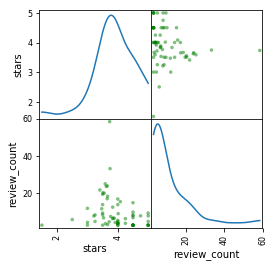

In [364]:
from pandas.plotting import scatter_matrix
scatter_matrix(state_avg, alpha=0.5, figsize=(4,4), diagonal='kde', s=50, color='g')

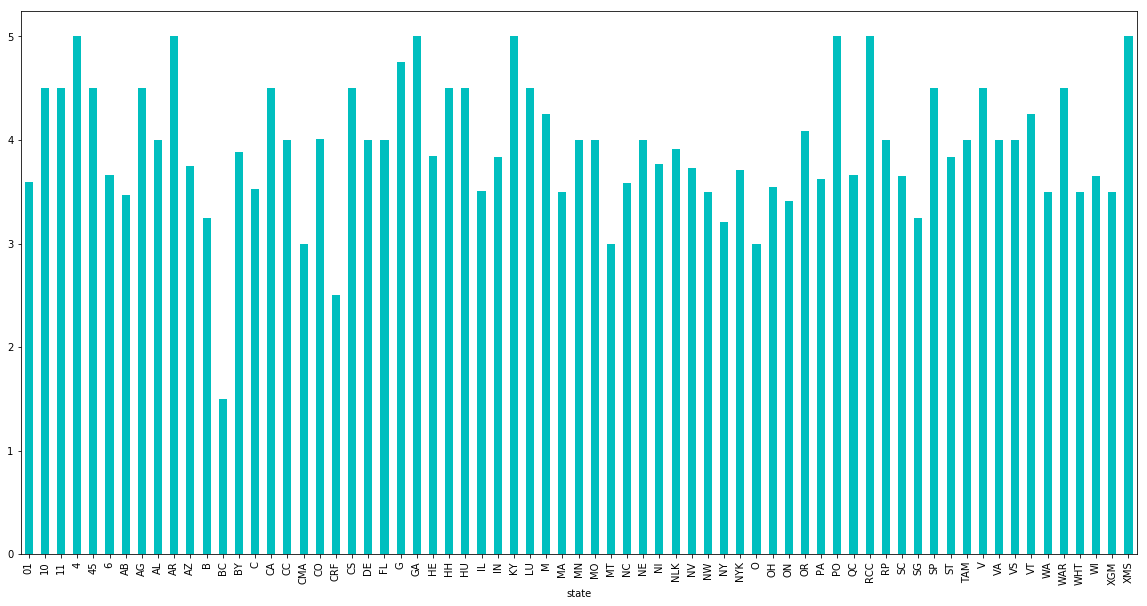

In [365]:
state_avg['stars'].plot(kind='bar', color='c', figsize=(20, 10))

In [366]:
df2.groupby(['state','city'])['stars','review_count'].mean().head()

,,stars,review_count
state,city,,
01,Moss,3.590909,3.818182
10,Ferrel,4.500000,3.000000
11,Montréal De L'aube,4.500000,3.000000
4,Enns,5.000000,3.000000
45,Parma,4.500000,7.000000


In [367]:
state_avg.corr()

,stars,review_count
stars,1.000000,-0.194896
review_count,-0.194896,1.000000


In [368]:
state_avg.cov()

,stars,review_count
stars,0.405055,-1.122340
review_count,-1.122340,81.870576


##### Stars and review count not heavily correlated

### Categories Exploration

In [5]:
#pick out unique rows
all_categories = df2['categories'].unique()

In [6]:
all_categories

array(['Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel',
       'Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services',
       'Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes', ...,
       "Fashion, Women's Clothing, Accessories, Bridal, Shopping",
       'Mobile Phones, Shopping, Department Stores, Food, Fashion, Drugstores, Electronics, Grocery, Discount Store',
       "Makeup Artists, Men's Clothing, Swimwear, Shopping, Hair Salons, Fashion, Hair Stylists, Beauty & Spas"],
      dtype=object)

In [7]:
#create a set of unique categories
unique_categories = set([])

for categories in all_categories:
    for cat in str(categories).split(','):
        #strip leading and trailing spaces
        cat = cat.strip()
        unique_categories.add(cat)

#make it a list
unique_categories = [cat for cat in unique_categories]

unique_categories

['Dumpster Rental',
 'Banks & Credit Unions',
 'Baby Gear & Furniture',
 'Laotian',
 'Talent Agencies',
 'Nail Technicians',
 'Wine Bars',
 'Books',
 'Sandwiches',
 'Allergists',
 'Departments of Motor Vehicles',
 'Door Sales/Installation',
 'Sport Equipment Hire',
 'Taxis',
 'Hang Gliding',
 'Batting Cages',
 'Ethnic Grocery',
 'Business Consulting',
 'Uniforms',
 'Wine & Spirits',
 'Boxing',
 'Audio/Visual Equipment Rental',
 'Persian/Iranian',
 'Muay Thai',
 'Pilates',
 'Toxicologists',
 'Computers',
 'Chiropractors',
 'Mattresses',
 'Digitizing Services',
 'Wine Tasting Room',
 'Discount Store',
 'Burmese',
 'Irish Pub',
 'Colonics',
 'Egyptian',
 'Jewelry Repair',
 'Mortgage Brokers',
 'Floral Designers',
 'Clowns',
 'Reflexology',
 'Beer Garden',
 'Balloon Services',
 'Water Suppliers',
 'Meat Shops',
 'Tours',
 'Car Stereo Installation',
 'Churches',
 'Colombian',
 'Gymnastics',
 'Social Security Law',
 'Senegalese',
 'Supper Clubs',
 'Snow Removal',
 'Waxing',
 'Rodeo',
 'Auto 

In [19]:
#count the categories
categories_count = {}
for cat in unique_categories:
    categories_count[cat] = 0
    
categories_count

{'Dumpster Rental': 0,
 'Banks & Credit Unions': 0,
 'Baby Gear & Furniture': 0,
 'Laotian': 0,
 'Talent Agencies': 0,
 'Nail Technicians': 0,
 'Wine Bars': 0,
 'Books': 0,
 'Sandwiches': 0,
 'Allergists': 0,
 'Departments of Motor Vehicles': 0,
 'Door Sales/Installation': 0,
 'Sport Equipment Hire': 0,
 'Taxis': 0,
 'Hang Gliding': 0,
 'Batting Cages': 0,
 'Ethnic Grocery': 0,
 'Business Consulting': 0,
 'Uniforms': 0,
 'Wine & Spirits': 0,
 'Boxing': 0,
 'Audio/Visual Equipment Rental': 0,
 'Persian/Iranian': 0,
 'Muay Thai': 0,
 'Pilates': 0,
 'Toxicologists': 0,
 'Computers': 0,
 'Chiropractors': 0,
 'Mattresses': 0,
 'Digitizing Services': 0,
 'Wine Tasting Room': 0,
 'Discount Store': 0,
 'Burmese': 0,
 'Irish Pub': 0,
 'Colonics': 0,
 'Egyptian': 0,
 'Jewelry Repair': 0,
 'Mortgage Brokers': 0,
 'Floral Designers': 0,
 'Clowns': 0,
 'Reflexology': 0,
 'Beer Garden': 0,
 'Balloon Services': 0,
 'Water Suppliers': 0,
 'Meat Shops': 0,
 'Tours': 0,
 'Car Stereo Installation': 0,
 '

In [20]:
def set_categories_count(categories):
    for cat in unique_categories:
        if categories is not None: 
            if cat in categories:
                categories_count[cat] += 1

In [21]:
df2['categories'].apply(lambda r: set_categories_count(r))
        
categories_count

{'Dumpster Rental': 21,
 'Banks & Credit Unions': 1241,
 'Baby Gear & Furniture': 322,
 'Laotian': 19,
 'Talent Agencies': 37,
 'Nail Technicians': 220,
 'Wine Bars': 1108,
 'Books': 1282,
 'Sandwiches': 6912,
 'Allergists': 90,
 'Departments of Motor Vehicles': 136,
 'Door Sales/Installation': 269,
 'Sport Equipment Hire': 1,
 'Taxis': 250,
 'Hang Gliding': 1,
 'Batting Cages': 29,
 'Ethnic Grocery': 30,
 'Business Consulting': 128,
 'Uniforms': 98,
 'Wine & Spirits': 1894,
 'Boxing': 214,
 'Audio/Visual Equipment Rental': 8,
 'Persian/Iranian': 176,
 'Muay Thai': 20,
 'Pilates': 354,
 'Toxicologists': 1,
 'Computers': 520,
 'Chiropractors': 1322,
 'Mattresses': 723,
 'Digitizing Services': 6,
 'Wine Tasting Room': 44,
 'Discount Store': 858,
 'Burmese': 11,
 'Irish Pub': 101,
 'Colonics': 39,
 'Egyptian': 19,
 'Jewelry Repair': 296,
 'Mortgage Brokers': 648,
 'Floral Designers': 146,
 'Clowns': 17,
 'Reflexology': 462,
 'Beer Garden': 83,
 'Balloon Services': 21,
 'Water Suppliers': 

In [22]:
#sort the categories from smallest to biggest
from collections import OrderedDict
sortedcat = OrderedDict(sorted(categories_count.items(), key=lambda t: t[1]))
sortedcat

OrderedDict([('None', 0),
             ('Sport Equipment Hire', 1),
             ('Hang Gliding', 1),
             ('Toxicologists', 1),
             ('Water Suppliers', 1),
             ('Senegalese', 1),
             ('Rodeo', 1),
             ('Market Stalls', 1),
             ('Baguettes', 1),
             ('Eastern European', 1),
             ('Japanese Sweets', 1),
             ('Court Reporters', 1),
             ('Playsets', 1),
             ('Milkshake Bars', 1),
             ('Natural Gas Suppliers', 1),
             ('Game Meat', 1),
             ('Halfway Houses', 1),
             ('Aviation Services', 1),
             ('Udon', 1),
             ('Street Art', 1),
             ('Vocal Coach', 1),
             ('Entertainment Law', 1),
             ('Beer Hall', 1),
             ('Rotisserie Chicken', 1),
             ('Tonkatsu', 1),
             ('Flyboarding', 1),
             ('Dialysis Clinics', 1),
             ('Outdoor Movies', 1),
             ('Billing Services', 1)

In [79]:
#turn the categories into a dataframe
sortedcat_df = pd.DataFrame.from_dict(sortedcat, orient='index')
sortedcat_df['count'] = sortedcat_df[0]
sortedcat_df = sortedcat_df.drop([0], axis=1)
sortedcat_df.head()

,count
None,0
Sport Equipment Hire,1
Hang Gliding,1
Toxicologists,1
Water Suppliers,1


In [80]:
#put categories in a column so we can query it
sortedcat_df = sortedcat_df.reset_index()
sortedcat_df.head()

,index,count
0,None,0
1,Sport Equipment Hire,1
2,Hang Gliding,1
3,Toxicologists,1
4,Water Suppliers,1


In [81]:
#rename columns
sortedcat_df.rename(columns={'index':'category'}, inplace=True)
sortedcat_df.head()

,category,count
0,None,0
1,Sport Equipment Hire,1
2,Hang Gliding,1
3,Toxicologists,1
4,Water Suppliers,1


In [92]:
#see stats of categories
sortedcat_df.describe()

,count
count,1306.000000
mean,583.994640
std,2475.003744
min,0.000000
25%,17.000000
50%,72.500000
75%,333.500000
max,57173.000000


In [97]:
#used to calculate % of total
total = sortedcat_df['count'].sum()
print(total)

762697


In [99]:
sortedcat_df['percentage of total'] = sortedcat_df['count']/total
sortedcat_df.tail()

,category,count,percentage of total
1301,Home Services,18634,0.024432
1302,Beauty & Spas,18967,0.024868
1303,Shopping,30231,0.039637
1304,Food,33488,0.043907
1305,Restaurants,57173,0.074962


In [110]:
sortedcat_df.mean()

count                  583.994640
percentage of total      0.000766
dtype: float64

In [114]:
#pick out categories above mean only
topcat = sortedcat_df[sortedcat_df["percentage of total"] >= 0.000766]
topcat

,category,count,percentage of total
1084,Pet Training,585,0.000767
1085,Adult,594,0.000779
1086,Pest Control,596,0.000781
1087,Session Photography,597,0.000783
1088,Towing,599,0.000785
1089,Caribbean,604,0.000792
1090,Pool Cleaners,610,0.000800
1091,Electronics Repair,611,0.000801
1092,Nurseries & Gardening,615,0.000806
1093,Thrift Stores,618,0.000810


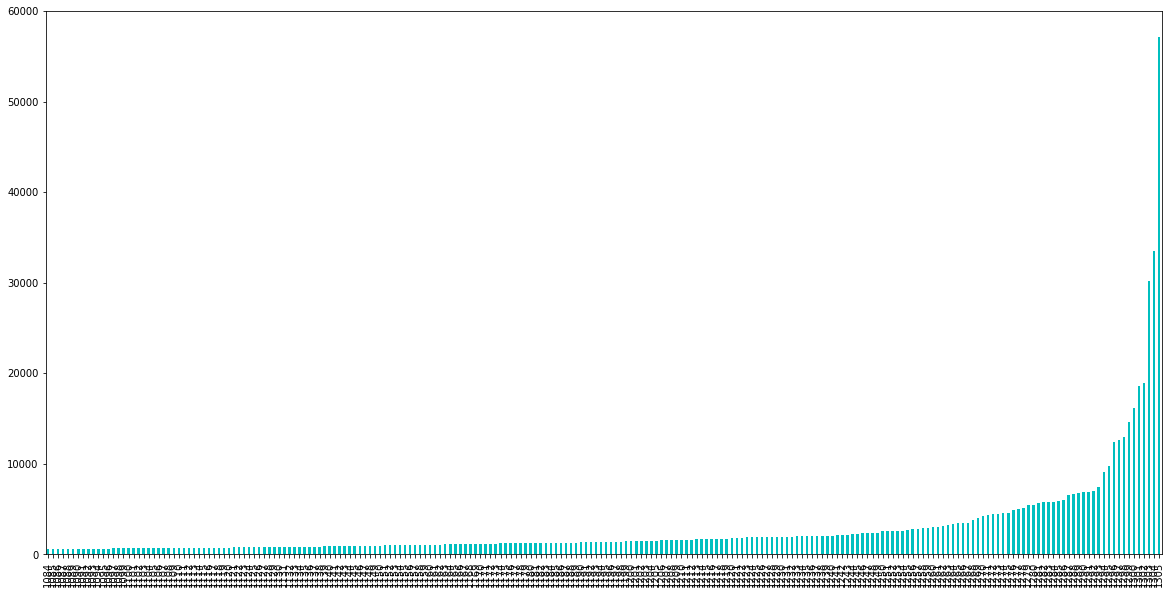

In [112]:
topcat['count'].plot(kind='bar', color='c', figsize=(20, 10))